In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline    
import warnings
warnings.filterwarnings("ignore")
import sklearn 

In [2]:
abalone = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
abalone.isnull().sum().sum()

0

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


The above image reveals that data is easily distributed on features.

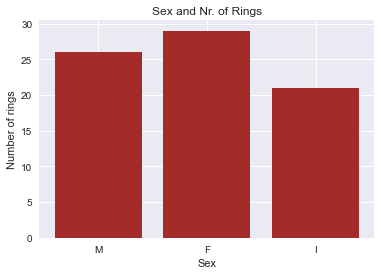

In [6]:
# Create the fig, ax
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(abalone["Sex"][:1000], abalone["Rings"][:1000], color="brown")

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

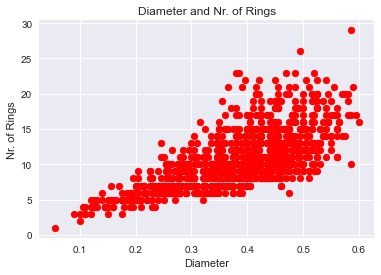

In [7]:
# Create a fig, ax
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(abalone["Diameter"][:1000], abalone["Rings"][:1000], color="red")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

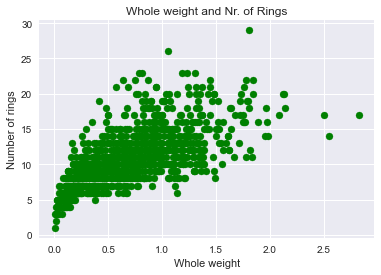

In [8]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(abalone["Whole weight"][:1000], abalone["Rings"][:1000], color="green")

#Create a legend
ax.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

We can see from the data visualization that in general, the larger the diameter and weight of an abalone shell, the more likely it is to have more rings.

In [9]:
abalone.isna().sum().sum()

0

In [10]:
# Check which columns have string values
for label, content in abalone.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

Sex


In [11]:
abalone["Sex"].value_counts()
abalone["Sex"] = abalone["Sex"].astype("category").cat.as_ordered()
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [12]:
data_codes = abalone["Sex"].cat.codes
data_codes

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int8

In [13]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
abalone["Sex"] =  l_encoder.fit_transform(abalone["Sex"])

In [14]:
# Add age column
abalone["Age"] = abalone["Rings"] + 1.5

# Drop rings column
abalone.drop("Rings", axis=1, inplace=True)

In [15]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [16]:
X = abalone.drop("Age", axis=1)
y = abalone["Age"]

In [17]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [18]:
y[:5]

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=14)

In [20]:
type(X_train), type(y_train), type(X_test), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

In [21]:
# import model
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor(n_jobs=-1, #n_jobs=-1 means that we are using all computer power to fit the model
                           random_state=14)

# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=14)

In [22]:
# import the evaluation metrics
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error

# create an evaluation function
def show_score(model):
  train_preds= model.predict(X_train)
  test_preds = model.predict(X_test)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Test MAE": mean_absolute_error(y_test, test_preds),
            "Training MSE": mean_squared_log_error(y_train, train_preds),
            "Test MSE": mean_squared_log_error(y_test, test_preds),
            "Training RMSE": np.sqrt(mean_squared_log_error(y_train, train_preds)),
            "Test RMSE": np.sqrt(mean_squared_log_error(y_test, test_preds)),
            "Training R2": r2_score(y_train, train_preds),
            "Test R2": r2_score(y_test, test_preds)}
  return scores

In [23]:
rf.fit(X_train, y_train)
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

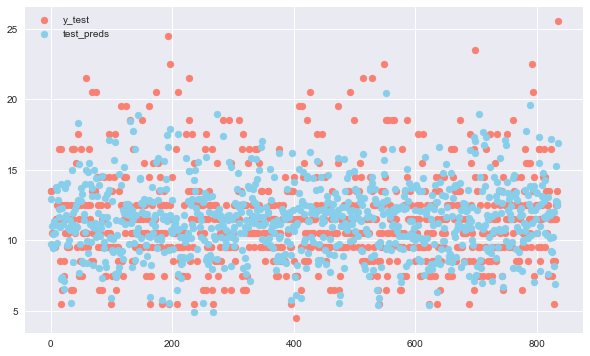

In [24]:
# Predict the labels on test data
test_preds = rf.predict(X_test) 

# Visualize predictions vs true labels
fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="salmon", label="y_test")
plt.scatter(range(y_test.shape[0]), test_preds, color="skyblue", label="test_preds")
plt.legend();

In [26]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=14), param_distributions=rf_grid, n_iter=100, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=14),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 1, 2, 5],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 100, 200]},
                   verbose=True)

In [30]:
show_score(rs_model)

{'Training MAE': 1.0099332085964559,
 'Test MAE': 1.4564998707948578,
 'Training MSE': 0.010372839180120585,
 'Test MSE': 0.0222489418649288,
 'Training RMSE': 0.10184713633735896,
 'Test RMSE': 0.14916079198277543,
 'Training R2': 0.797401613607706,
 'Test R2': 0.5607174360229721}

In [31]:
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [32]:
# Check most ideal params
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': None}

In [33]:
# Ideal model 

ideal_model = RandomForestRegressor(max_depth=None,
                                    max_features=0.5,
                                    min_samples_leaf=5,
                                    min_samples_split=5,
                                    n_estimators=200)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=200)

In [34]:
# Score of the deal model 
show_score(ideal_model)

{'Training MAE': 1.0896686081059834,
 'Test MAE': 1.4485082402785892,
 'Training MSE': 0.012048457001640929,
 'Test MSE': 0.022008450769334827,
 'Training RMSE': 0.10976546361055889,
 'Test RMSE': 0.1483524545443547,
 'Training R2': 0.7649895539355706,
 'Test R2': 0.5659506821092157}

In [35]:
# The original RandomForest model
show_score(rf)

{'Training MAE': 0.5804040706375337,
 'Test MAE': 1.5157296650717704,
 'Training MSE': 0.0034025564104252833,
 'Test MSE': 0.024190290175117212,
 'Training RMSE': 0.05833143586802303,
 'Test RMSE': 0.1555322801707646,
 'Training R2': 0.9357057341721267,
 'Test R2': 0.5253587245211205}

In [36]:
# Make predictions on test data
test_preds = ideal_model.predict(X_test)
test_preds [:20], y_test[:20]

(array([ 9.94503696, 12.91949675, 10.61419559,  9.36198966, 10.71964093,
         9.50914617, 11.52695448, 10.63210458, 12.38939278, 11.29967584,
         9.80680059, 13.44838941, 12.52258519, 11.67258495, 12.2630004 ,
        11.1448998 , 13.62340783,  7.38248315, 11.9039795 ,  7.4492725 ]),
 2374    13.5
 3341    13.5
 3361    10.5
 2574     9.5
 1624    10.5
 2874     9.5
 3908    10.5
 1302     9.5
 3771    11.5
 1024    11.5
 629     11.5
 890     12.5
 585     12.5
 2328    16.5
 2920    11.5
 1766     8.5
 778     16.5
 4119     5.5
 648     12.5
 538      6.5
 Name: Age, dtype: float64)

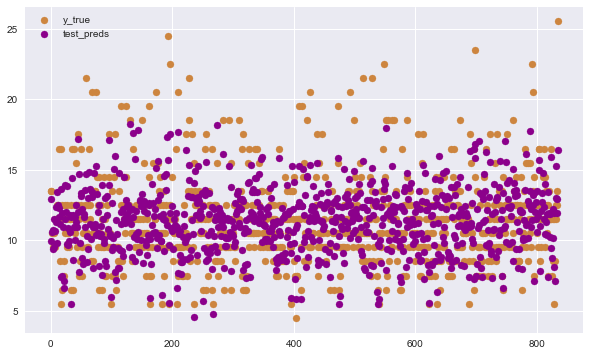

In [37]:
# Visualize predicted and true values

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color="peru", label="y_true")
plt.scatter(range(y_test.shape[0]), test_preds, color="darkmagenta", label="test_preds")
plt.legend();

In [38]:
# Create a function that finds feature importances
def plot_features(columns, importances, n=20):
  df = (pd.DataFrame({"features": columns,
                      "feature_importances": importances})
    .sort_values("feature_importances", ascending=False) # sort importances from the biggest to the smallest
    .reset_index(drop=True)) # deletes the index number

  #Plot the dataframe
  fig, ax = plt.subplots()
  ax.barh(df["features"][:n], df["feature_importances"][:20], color="skyblue")
  ax.set_ylabel("Features")
  ax.set_label("Feature importance")
  ax.invert_yaxis()

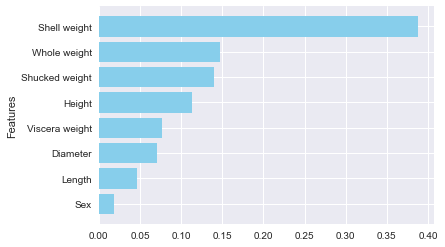

In [40]:
plot_features(X_train.columns, ideal_model.feature_importances_)

As we can see, shell weight was the most important characteristic in predicting the age of abalone. Also shelled weight and total weight were relatively important.